IMPORT LIBRARIES

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


DATA PREPROCESSING

In [17]:
df = pd.read_csv('datasets_house_prices.csv')

DATA EXPLORATION AND VISUALIZATION

In [18]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

<ipython-input-19-5ccd803487ed>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Bedrooms', y='Price', ci=None)


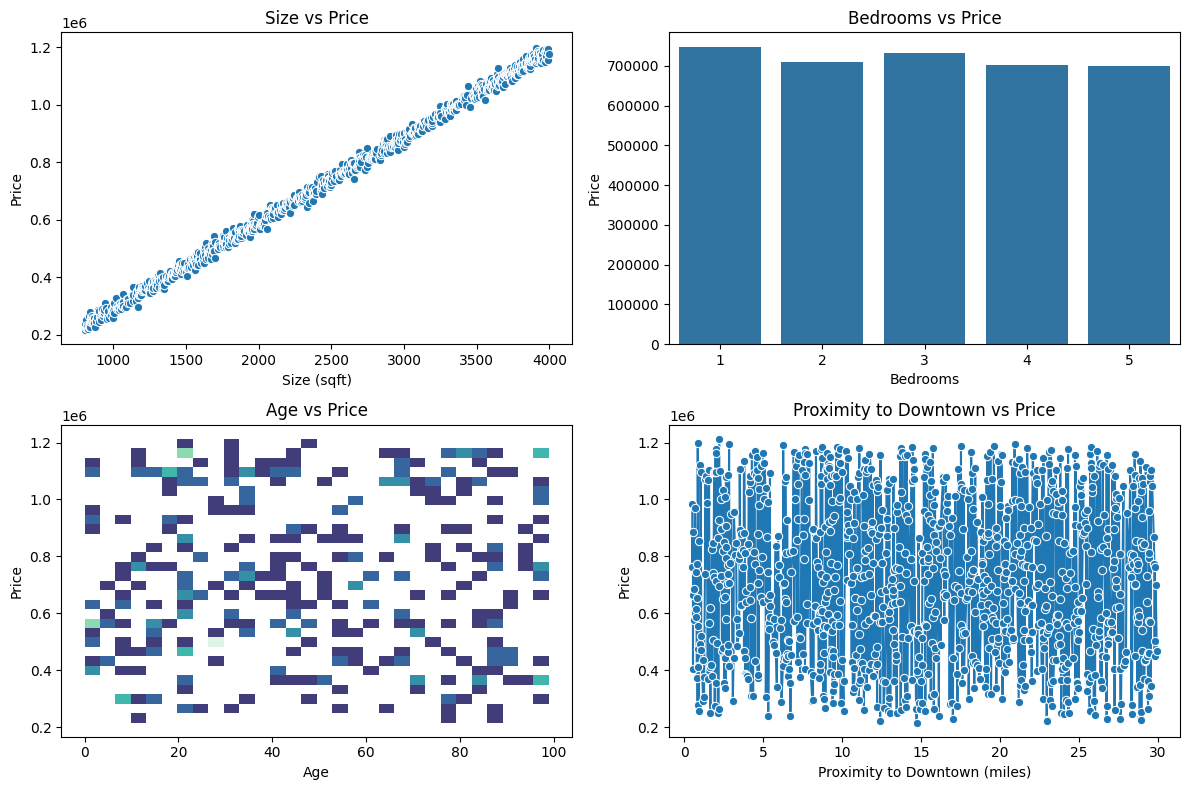

In [19]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Size (sqft)', y='Price', marker='o')
plt.title('Size vs Price')


plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Bedrooms', y='Price', ci=None)
plt.title('Bedrooms vs Price')


plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', y='Price', bins=30, pthresh=.05, cmap="mako")
plt.title('Age vs Price')


plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Proximity to Downtown (miles)', y='Price', marker='o')
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

<ipython-input-20-e4cda4fbab0b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


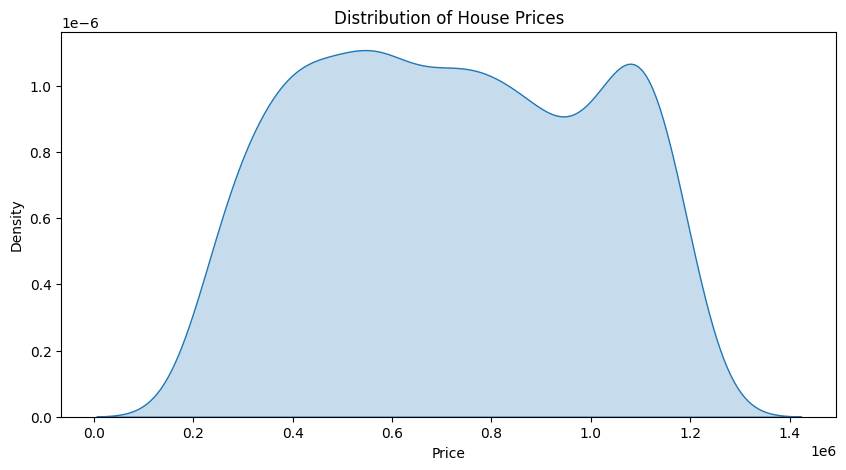

In [20]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price'], shade=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

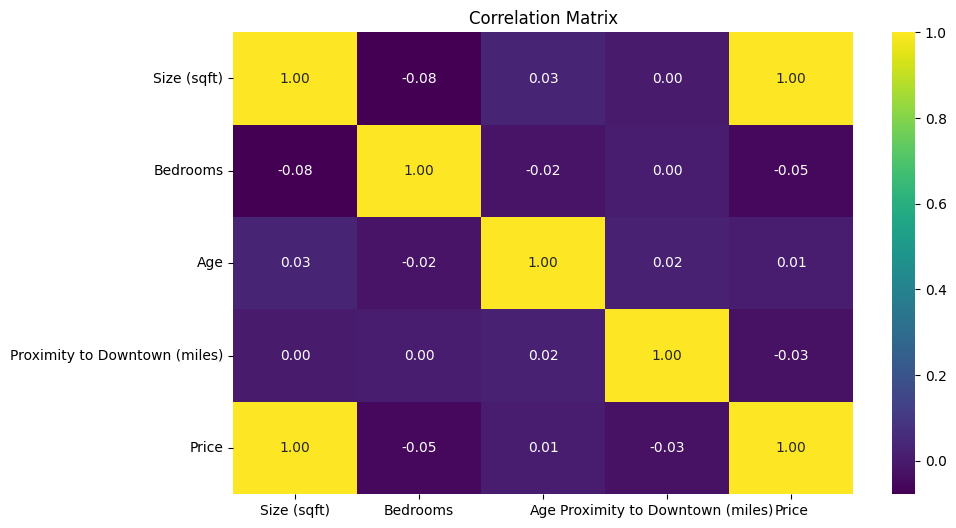

In [21]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.fillna(df.mean(), inplace=True)

In [23]:

print(df.columns)

Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')


In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = df['Price']

In [25]:
df.columns = df.columns.str.replace(' ', '')

MODEL DEVELOPMENT

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
coefficients = pd.DataFrame(model.coef_, ['Size (sq. ft.)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], columns=['Coefficient'])
print(coefficients)

                                 Coefficient
Size (sq. ft.)                 278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


MODEL EVALUATION

In [28]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00


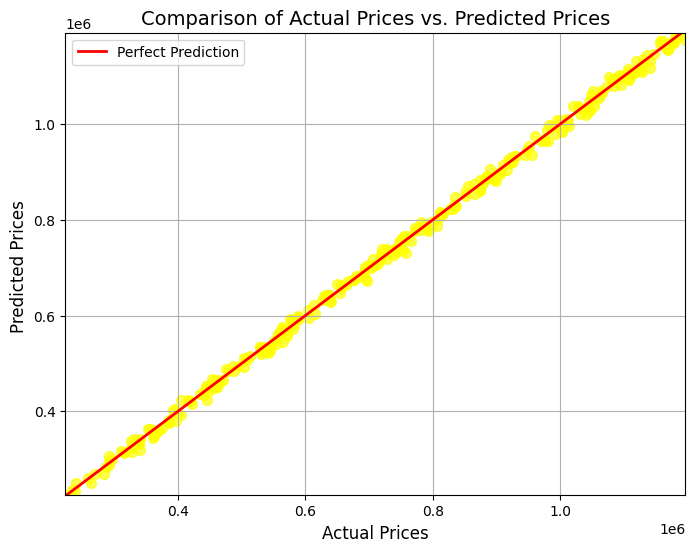

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='o', s=50, alpha=0.7, color='yellow')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlim(min(y_test) - 10, max(y_test) + 10)
plt.ylim(min(y_pred) - 10, max(y_pred) + 10)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices ', fontsize=12)
plt.title('Comparison of Actual Prices vs. Predicted Prices', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig('actual_vs_predicted_prices.png', dpi=300)
plt.show()

We used exploratory data analysis (EDA) in our investigation to investigate the connections between various variables and home prices. To visualize the patterns in the data, we employed correlation matrices, scatter plots, and histograms.

We then handled missing values, normalized the features, and made sure every variable was numerical as part of the preprocessing step of the data. Using Scikit-learn, we constructed a multiple regression model and trained it on a dataset that was divided 70–30 for training and testing.

We employed R-squared and Mean Squared Error (MSE) metrics to assess the model. In order to determine the impact of each feature, we also looked at the model coefficients. To evaluate accuracy, a comparison between projected and actual prices was displayed. Normalization and outliers were two major issues that were resolved with meticulous preprocessing and visualization.
